# 캐글 Advanced 머신러닝 실전 박치기 연습

In [1]:
import numpy as np
import pandas as pd
import gc
import time
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

Matplotlib is building the font cache; this may take a moment.


In [2]:
default_dir = './data/'
app_train = pd.read_csv(os.path.join(default_dir, 'application_train.csv'))
app_test = pd.read_csv(os.path.join(default_dir, 'application_test.csv'))

### TARGET 값 분포 및 AMT_INCOME_TOTAL 값 Histogram
 * TARGET 값별 분포도를 pandas, matplotlib, seaborn을 통한 Histogram 표현

In [3]:
# 값 개수 보기
# app_train['TARGET'].value_counts()
# 백분율로 보기
# app_train['TARGET'].value_counts() / app_train.shape[0]

<AxesSubplot:>

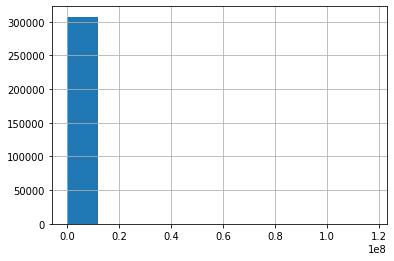

In [4]:
app_train['AMT_INCOME_TOTAL'].hist()

### AMT_INCOME_TOTAL 이 100000 이하인 값에 대한 분포도 그래프

<AxesSubplot:>

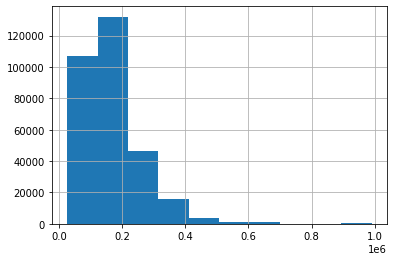

In [9]:
app_train[app_train['AMT_INCOME_TOTAL'] < 1000000]['AMT_INCOME_TOTAL'].hist()

(array([1.07232e+05, 1.32012e+05, 4.62030e+04, 1.57320e+04, 3.63400e+03,
        1.09300e+03, 8.67000e+02, 1.62000e+02, 1.24000e+02, 2.02000e+02]),
 array([ 25650., 122085., 218520., 314955., 411390., 507825., 604260.,
        700695., 797130., 893565., 990000.]),
 <BarContainer object of 10 artists>)

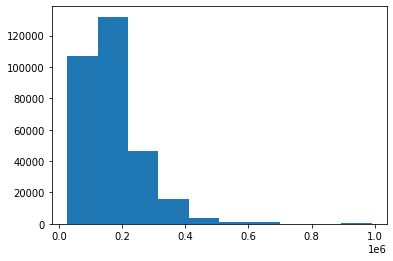

In [10]:
plt.hist(app_train[app_train['AMT_INCOME_TOTAL'] < 1000000]['AMT_INCOME_TOTAL'])

/home/lmu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

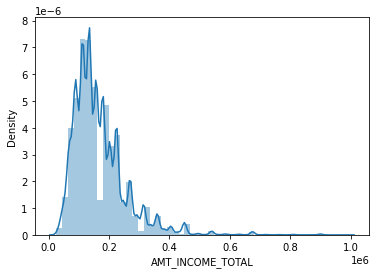

In [8]:
sns.distplot(app_train[app_train['AMT_INCOME_TOTAL'] < 1000000]['AMT_INCOME_TOTAL'])

/home/lmu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

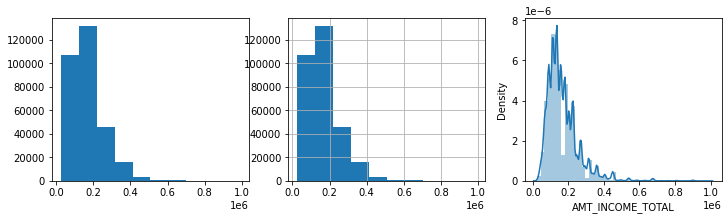

In [16]:
displayed_data = app_train[app_train['AMT_INCOME_TOTAL'] < 1000000]['AMT_INCOME_TOTAL']
fig, axs = plt.subplots(figsize=(12, 3), nrows=1, ncols=3, squeeze=False)
axs[0][0].hist(displayed_data)
displayed_data.hist(ax=axs[0][1])
sns.distplot(displayed_data, ax=axs[0][2])

### TARGET 값에 따른 AMT_INCOME_TOTAL 값 분포도 비교
 * `distplot`와 `violinplot` 으로 시각화

/home/lmu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/lmu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

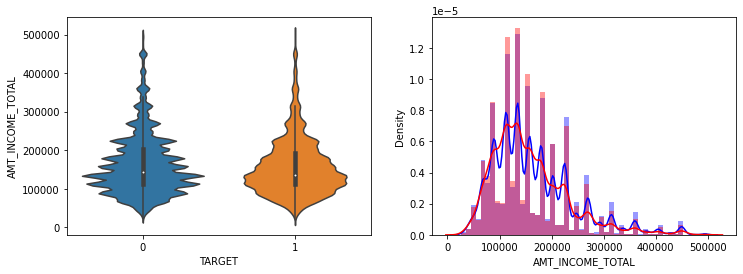

In [17]:
cond0 = (app_train['TARGET'] == 0)
cond1 = (app_train['TARGET'] == 1)
mnt_threshold = 500000
cond_mnt = (app_train['AMT_INCOME_TOTAL'] < mnt_threshold)

fig, axs = plt.subplots(figsize=(12, 4), nrows=1, ncols=2, squeeze=False)
sns.violinplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_train[cond_mnt], ax=axs[0][0])
sns.distplot(app_train[cond0 & cond_mnt]['AMT_INCOME_TOTAL'], ax=axs[0][1], color='blue')
sns.distplot(app_train[cond1 & cond_mnt]['AMT_INCOME_TOTAL'], ax=axs[0][1], color='red')